<center>
<img src="../../img/ods_stickers.jpg">
</center>


# <center>Прогноз успеваемости школьников</center>
<center> Автор: Куценко Андрей

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR

from sklearn.learning_curve import learning_curve

from scipy import stats

**[Данные](https://www.kaggle.com/uciml/student-alcohol-consumption/data) по успеваемости школьников (средняя школа)** 

In [5]:
#Нас будет интересовать только успеваемость по математике
#data = pd.read_csv('student-mat.csv')
data = pd.read_csv('../../data/student-mat.csv')

In [6]:
print("Количество учащихся:",len(data))

Количество учащихся: 395


In [7]:
#Первый взгляд на данные
data.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [8]:
#В данных пропусков нет, повезло.
print(len(data)-len(data.dropna()))

0


In [9]:
data.get_ftype_counts()

int64:dense     16
object:dense    17
dtype: int64

# Признаки #

Всего три типа признаков **binary** - бинарный, **numeric** - численный и **nominal** - категориальный.

**school** - школа студента (binary: 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira)   
**sex** - пол студента (binary: 'F' - female или 'M' - male)   
**age** - возраст студента (numeric: от 15 до 22)   
**address** - тип места проживания (binary: 'U' - город or 'R' - сельская местность)   
**famsize** - размер семьи (binary: 'LE3' - меньше или равно 3 or 'GT3' - больше 3)   
**Pstatus** - живут ли родители совместно (binary: 'T' - живут вместе или 'A' - поотдельности)   
**Medu** - образование матери (numeric: 0 - отсутствует, 1 - начальная школа (4th grade), 2 – с 5-ого по 9ый класс, 3 – оконченная средняя школа or 4 – высшее образование)    
**Fedu** - образование отца (numeric: 0 - отсутствует, 1 - начальная школа (4th grade), 2 – с 5-ого по 9ый класс, 3 – оконченная средняя школа or 4 – высшее образование)       
**Mjob** - работа матери (nominal: 'teacher'-учитель, 'health'-здравоохранения, 'services' - гражданская\государственная работа (например административная или в полиции), 'at_home' - дома или 'other')     
**Fjob** - работа отца (nominal: 'teacher'-учитель, 'health'-здравоохранения, 'services' - гражданская\государственная работа (например административная или в полиции), 'at_home' - дома или 'other')    
**reason** - причина выбора школы (nominal:'home'-близко к дому, 'reputation'-репутация школы, 'course'-предпочтения в курсах или 'other')        
**guardian** - представитель студента (nominal: 'mother', 'father' или 'other')   
**traveltime** - время от дома до школы (numeric: 1 - меньше 15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 часа, или 4 - больше 1 часа)   
**studytime** - еженедельные временные затраты на обучение (numeric: 1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 to 10 hours, или 4 - больше 10 часов)   
**failures** - количество проваленных классов в прошлом (numeric: n если n=1,2,3, иначе 4)   
**schoolsup** - дополнительная поддержа в обучении (видимо финансовая) (binary: yes or no)   
**famsup** - семейная образовательная поддержка (binary: yes or no)   
**paid** - оплата дополнительных уроков по предмету (Math) (binary: yes or no)    
**activities** - внеклассовые активности (binary: yes or no)    
**nursery** - учился ли в детском саду (binary: yes or no)    
**higher** - желание получить высшее образование (binary: yes or no)     
**internet** - домашний доступ к интернету (binary: yes or no)     
**romantic** - в любовных отношениях (binary: yes or no)     
**famrel** - качество семейных взаимоотношений (numeric: от 1 - очень плохие до 5 - отличные)     
**freetime** - кол-во свободного времени после школы (numeric: от 1 - очень мало до 5 - очень много)     
**goout** - как часто гуляет с друзьями (numeric: от 1 - очень мало до 5 - очень много)     
**Dalc** - кол-во потребляемого алкоголя в будни (numeric: от 1 - очень мало до 5 - очень много)     
**Walc** - кол-во потребляемого алкоголя в выходные (numeric: от 1 - очень мало до 5 - очень много)     
**health** - состояние здоровья (numeric: от 1 - очень плохое до 5 - отличное)      
**absences** - количество пропусков занятий (numeric: от 0 до 93)     

Семестровые оценки по математике (целевые признаки):

**G1** - оценка за первый семестр (numeric: от 0 до 20)     
**G2** - оценка за второй семестр (numeric: от 0 до 20)    
**G3** - финальная оценка (numeric: от 0 до 20)    

**Всего признаков:33**   
**Количество учащихся:395**

**Пожалуй, интересней всего в этой задаче посмотреть взаимодействия между признаками и выделить признаки наиболее влияющие на успеваемость. Научится предсказывать оценку тоже не плохо, например, зная оценки в одном классе школы можно предсказать оценки в другом классе.**

### Сразу преобразуем категориальные и бинарные признаки к булевому типу, чтобы матрицу корреляции можно было построить для всех признаков ###

### Разбиение признаков на группы для дальнейшего преобразования ###

In [8]:
binary_features=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [9]:
nominal_features=['Mjob','Fjob','reason','guardian']

In [10]:
numeric_features=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']

In [11]:
target_features=['G1','G2','G3']

In [12]:
len(binary_features)+len(nominal_features)+len(numeric_features)+len(target_features)

33

In [13]:
data_num=data[numeric_features]
data_bin=data[binary_features]
data_nom=data[nominal_features]
data_target=data[target_features]

### Преобразование бинарных и категориальных признаков методами pandas (one hot encoding) и отсечение признаков не добавляющих информации###

In [14]:
data_bin_dum=pd.get_dummies(data_bin)

In [15]:
#Бинарные признаки разбились на взаимодополняющие пары, из каждой пары достаточно оставить только один признак.
data_bin_cut=data_bin_dum.iloc[:,1::2]

In [16]:
data_nom_dum=pd.get_dummies(data_nom)

In [17]:
#Зная другие признаки соответствующие исходному категориальному признаку, значения этих признаков определяется однозначно.
#Удаляем
data_nom_cut=data_nom_dum.drop(['Mjob_other','Fjob_other','reason_other','guardian_other'],axis=1)

### Собираем всё вместе в новый датафрейм ###

In [18]:
data_reformed=pd.concat([data_num,data_bin_cut,data_nom_cut,data_target],axis=1)

### Создание целевой переменной и статистика ###

In [19]:
#Целевая переменная, которую мы будем предсказывать - это средняя сумма баллов за все экзамены.
data_reformed['G_average']=(data_reformed['G1']+data_reformed['G2']+data_reformed['G3'])/3

In [20]:
#Посмотрим на статистику
data_reformed.describe().T
#В бинарных признаках например: higher_yes 1 - означает да(хочет получить высшее образование), 0 - означает нет.

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.0,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.0,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.0,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.0,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.0,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


### Построим матрицу корреляций ###

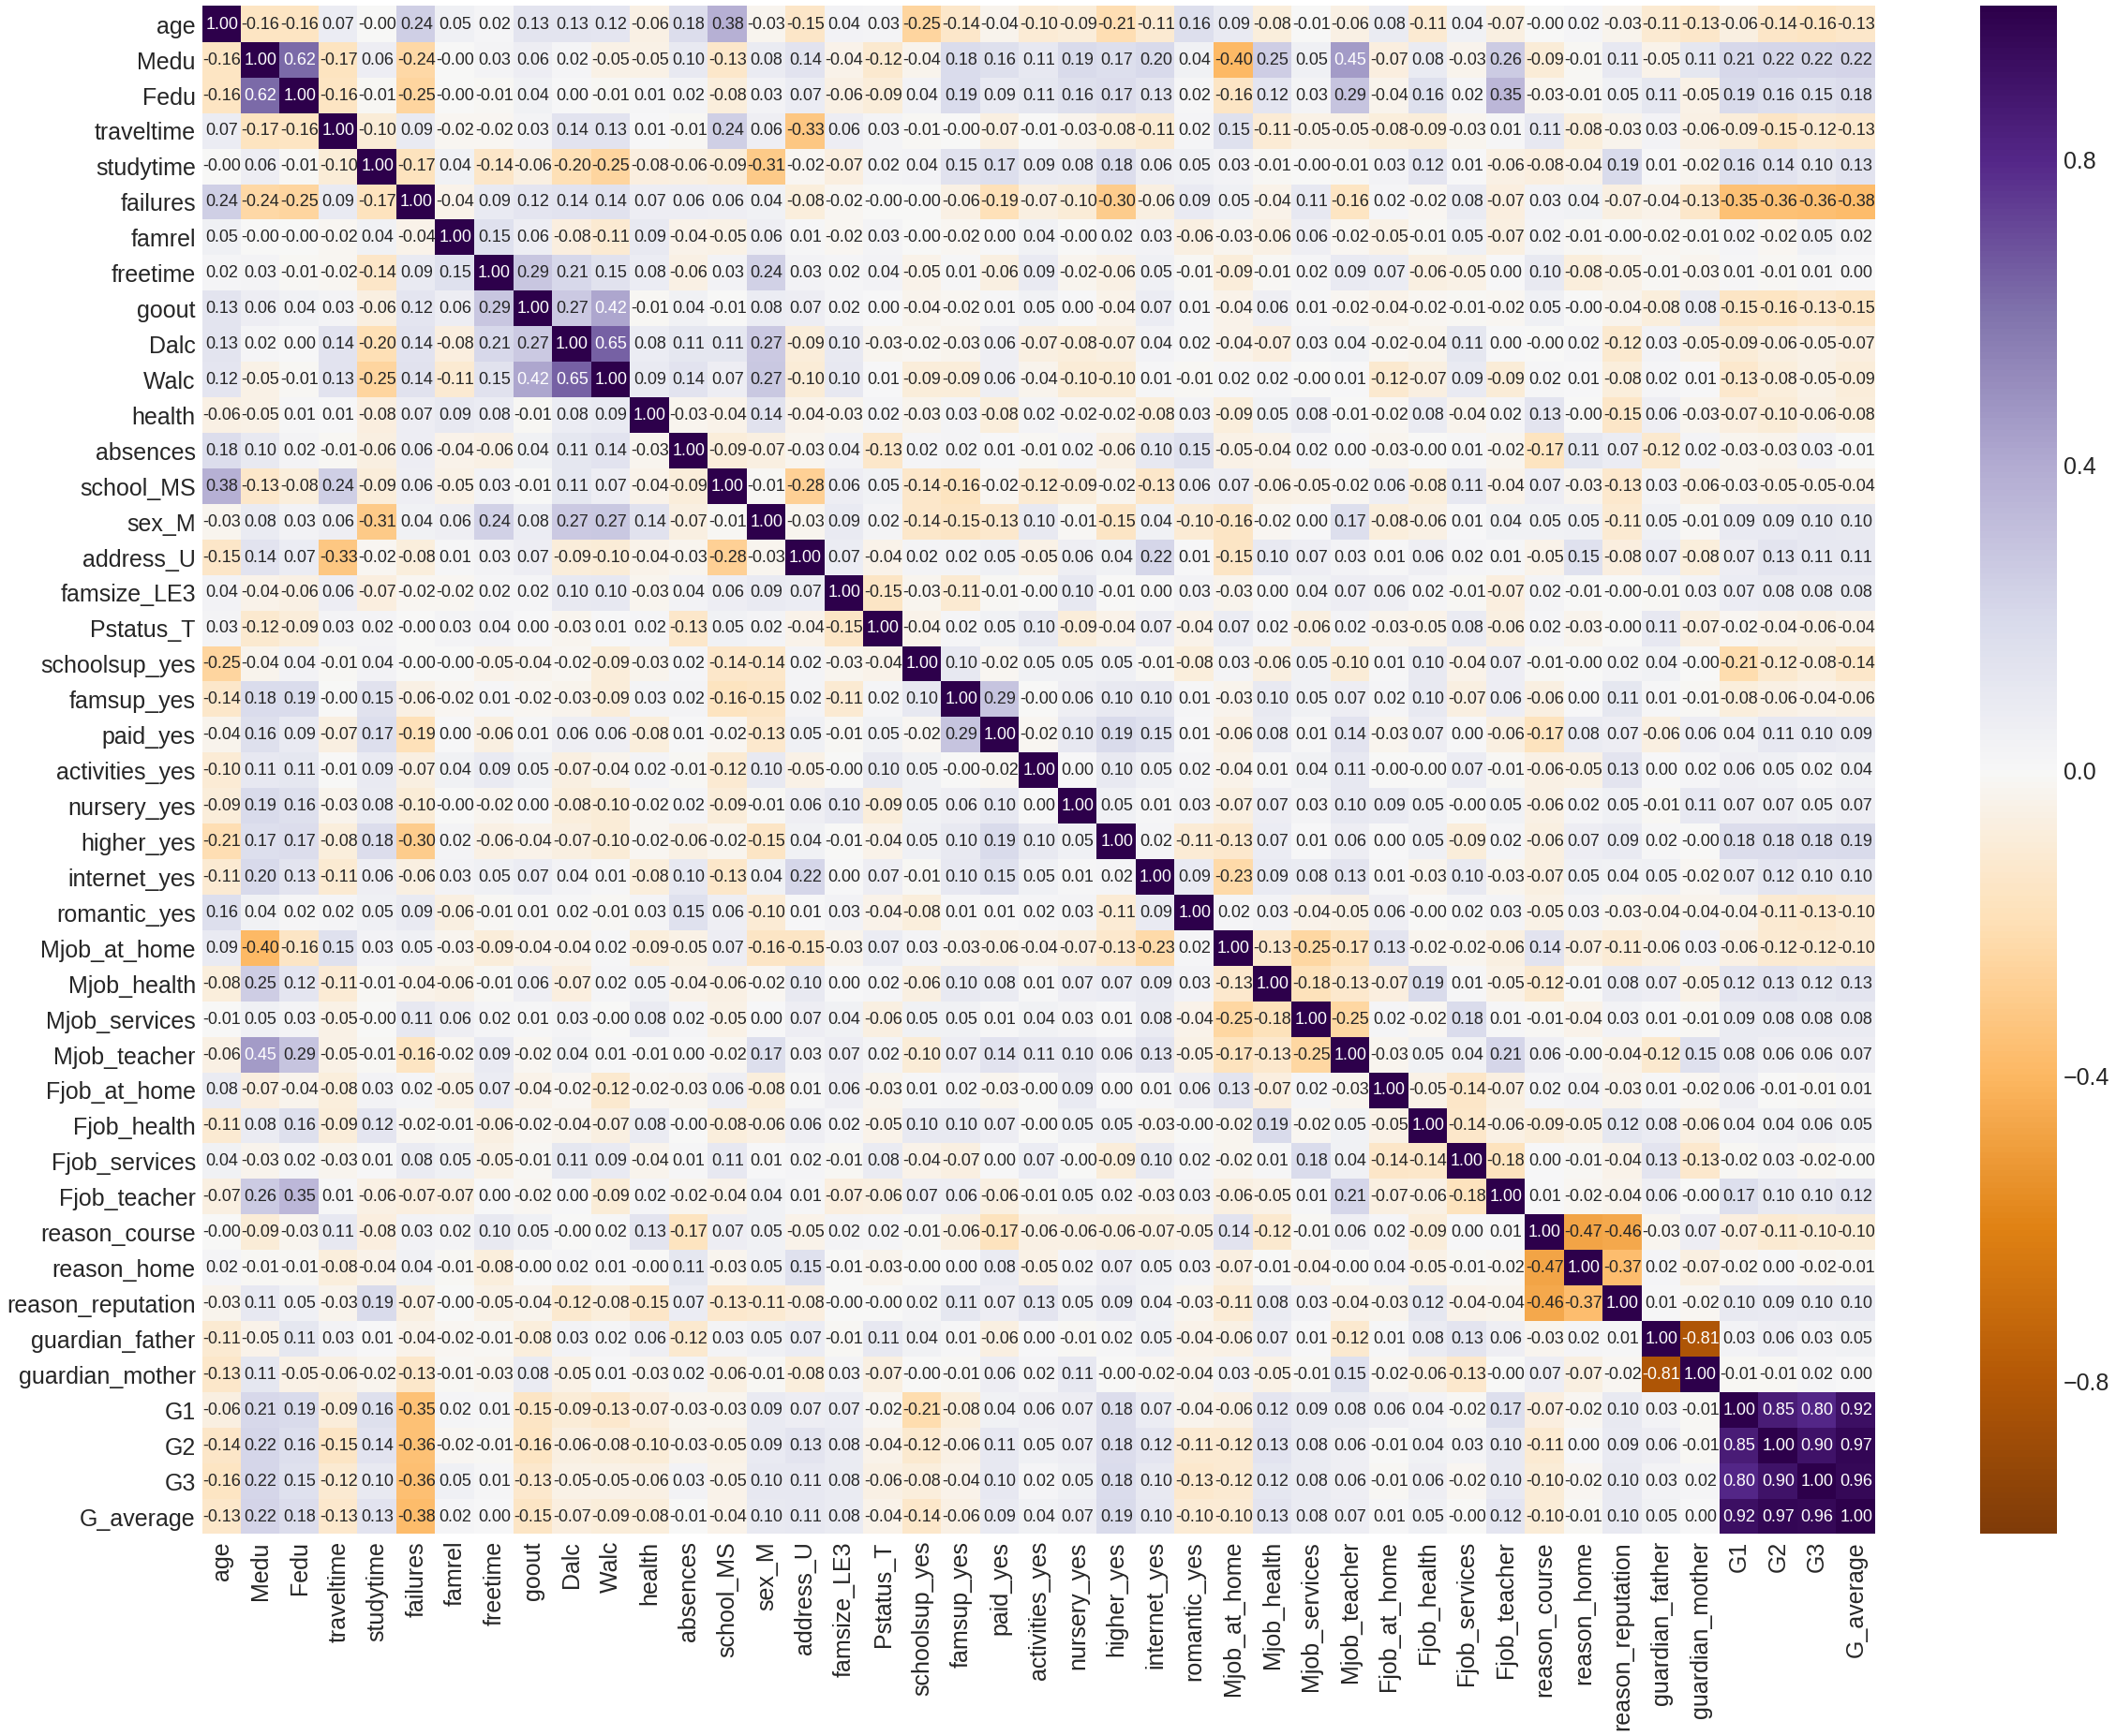

In [21]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,30))
corr_matrix=data_reformed.corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cbar = True,cmap='PuOr',annot_kws={"size":18})

### Что можно заметить? ###

#### Видно, что оценка за экзамен больше всего коррелирует с оценкой за другие экзамены, так что выбранная целевая переменная (среднее значение за все экзамены) вполне отражает то, что хочется спрогнозировать. Видим также сильную корреляцию между признаками созданными из одной категориальной переменной - это не очень интересно и большую пользу из этого врядли удастся извлечь ####


In [22]:
#Присутствует также сильная корреляция между уровнем образования матери и отца
print(corr_matrix['Fedu']['Medu'])

0.623455112081


In [23]:
#Есть и вполне естественные корреляции между потреблением алкоголя по будням, потреблением алкоголя в выходные и тем
#сколько человек гуляет с друзьями.
print(corr_matrix['Dalc']['Walc'])
print(corr_matrix['Walc']['goout'])

0.647544230018
0.420385745472


In [24]:
# Очень интересно, большая отрицательная корреляция между мужским полом и временем затрат на учебу
print(corr_matrix['sex_M']['studytime'])

-0.306267617568


In [25]:
# А также вполне логичная корреляция между проживанием в городе (а не сельской местности) и временем на дорогу до школы
print(corr_matrix['address_U']['traveltime'])

-0.328095504446


### Посмотрим на корелляцию признаков с целевой переменной (последний столбец) ###

In [26]:
#Бросается в глаза сильная корелляция между количеством не сдач экзамена ранее и средней оценкой
print(corr_matrix['G_average']['failures'])
#В некотором смысле failures это обратный признак к средней оценке, пожалуй, для чистоты эксперимента его надо исключить
data_reformed=data_reformed.drop(['failures'],axis=1)

-0.375758895927


In [27]:
#Сильная положительная корреляция оценки с уровнем образования матери и отца, временем занятий и желанием получить 
#высшее образование.
print(corr_matrix['G_average']['Medu'])
print(corr_matrix['G_average']['Fedu'])
print(corr_matrix['G_average']['studytime'])
print(corr_matrix['G_average']['higher_yes'])


0.224259868406
0.175852135102
0.134564718866
0.189483495125


In [28]:
#А также оценка по математике положительно коррелирует с мужским полом.
print(corr_matrix['sex_M']['G_average'])

0.101122004738


In [29]:
#Из отрицательных корреляций наиболее выделяются тусовки с друзьями, schoolsup и работа матери на дому, ого!
print(corr_matrix['G_average']['goout'])
print(corr_matrix['G_average']['schoolsup_yes'])
print(corr_matrix['G_average']['Mjob_at_home'])
#Есть подозрение, что schoolsup - это поддержка бедных детей (а бедные дети скорее всего хуже учатся).

-0.154511336465
-0.1376435544
-0.104032386886


## Посмотрим на распределение наиболее интересных признаков (по остальным можно судить по статистике построенной ранее) ##

In [30]:
data_reformed.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS', 'sex_M',
       'address_U', 'famsize_LE3', 'Pstatus_T', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes', 'Mjob_at_home', 'Mjob_health',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_reputation', 'guardian_father', 'guardian_mother', 'G1', 'G2',
       'G3', 'G_average'],
      dtype='object')

In [31]:
features_to_hist=['age','Medu','Fedu','studytime']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b308a898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b026c898>]], dtype=object)

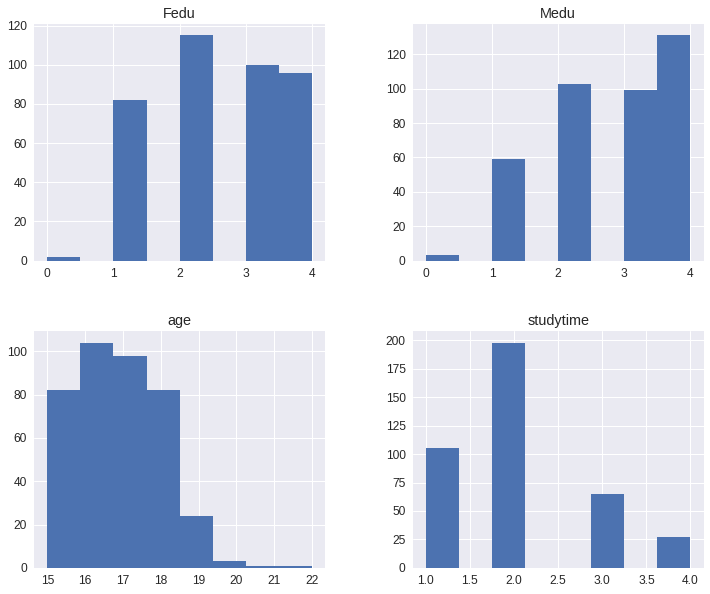

In [32]:
#Строим графики
sns.set(font_scale=1.2)
data_reformed[features_to_hist].hist(figsize=(12,10),bins=8)
#sns.pairplot(data_reformed[features_to_hist + ['G_average']])

In [33]:
#Много родителей не закончили среднюю школу, гм!
#Большинство учеников тратят на учебу от 2 до 5 часов в неделю
#А средний возраст равен:
print('средний возраст:',data_reformed['age'].mean())
#Людей старше 19 всего лишь 5, максимальный возраст - 22 года.
data_reformed['age'].value_counts()
#Существенных выбросов в данных тоже не обнаружено

средний возраст: 16.696202531645568


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

## Наконец посмотрим на распределение целевой переменной ##

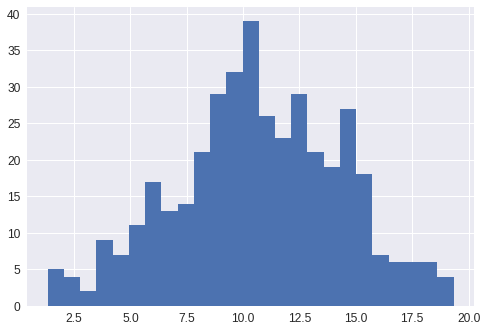

In [34]:
data_reformed['G_average'].hist(bins=25)

In [35]:
# Немного напоминает нормальное распределение
# Посмотрим, что говорят статистические тесты.
print(stats.normaltest(data_reformed['G_average']))
print('skew=',stats.skew(data_reformed['G_average']))
print(stats.skewtest(data_reformed['G_average']))


NormaltestResult(statistic=3.6928676191965177, pvalue=0.15779890502519711)
skew= -0.1400131306996514
SkewtestResult(statistic=-1.1513897743446935, pvalue=0.24957191875326368)


### Выбор метрики ###

#### Так как мы решаем задачу регрессии и значимых выбросов в задаче нет, то можно использовать метрику MSE. Впринципе, можно было бы использовать и R2 метрику (коэффициент детерминации), но, вооружившись baseline в виде начального приближения средним, будем использовать MSE. ####

In [36]:
#Отделение признаков от целевой переменной
X=data_reformed.iloc[:,:-4]
y=data_reformed.iloc[:,-1:]

### Разбиение выборки на train и test, первый 'baseline'###

In [37]:
#Заодно сразу сделаем разбиение на train и test.
#Обязательно перемешать!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True,random_state=42)

In [38]:
#Среднее значение оценки на трейне
y_mean=y_train.mean()
y_mean_for_test=[float(y_mean) for x in range(len(y_test))]
y_mean_for_train=[float(y_mean) for x in range(len(y_train))]

In [39]:
#Результаты приближения средним на трейне
print(mean_squared_error(y_train,y_mean_for_train))

13.0193528437


In [67]:
#Результаты приближения средним на тесте
baseline_mean=mean_squared_error(y_test,y_mean_for_test)
print(mean_squared_error(y_test,y_mean_for_test))

15.0645386839


# Выбор модели #

### Для данной задачи хорошо подходит случайный лес, так как в задаче приличное количество признаков разных типов, а с этим случайный лес справляется хорошо, также он не чувствителен к масштабированию и может помочь отобрать наиболее важные признаки. Но видно, что целевая переменная зависит от многих признаков линейно, так что может пригодиться и простая линейная регрессия. ###

### Впрочем, ничто не мешает опробовать и другие регрессоры ###

#### Для начала закончим предобработку данных и отберем признаки с помощью случайного леса####

In [41]:
#Для удобства сделаем массивы целевых переменных строками
y_train_row=[]
y_test_row=[]
for x in y_train.iloc[:,0]:
    y_train_row.append(x)
for x in y_test.iloc[:,0]:
    y_test_row.append(x)

In [42]:
#Обучаем базовый случайны лес для отбора признаков
rfc_base=RandomForestRegressor(n_estimators=500,random_state=42)
rfc_base.fit(X_train,y_train_row)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
#Выводим значимость признаков
features = pd.DataFrame(rfc_base.feature_importances_, index=X_train.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features

,Importance
absences,0.139721
goout,0.065683
health,0.055834
age,0.050128
studytime,0.049414
Medu,0.046246
freetime,0.041387
Fedu,0.040379
higher_yes,0.038536
famrel,0.035600


In [44]:
#Отбросим 15 самых малозначимых признаков
#Я пробовал удалять разное количество малозначимых признаков и удалить 15 оказалось оптимальным.(с точки зрения кроссвалидации, см. далее)
features_cutted=features.iloc[:-15].index
features_cutted

Index(['absences', 'goout', 'health', 'age', 'studytime', 'Medu', 'freetime',
       'Fedu', 'higher_yes', 'famrel', 'schoolsup_yes', 'Walc', 'paid_yes',
       'traveltime', 'Dalc', 'Fjob_teacher', 'famsup_yes', 'reason_course',
       'sex_M', 'activities_yes', 'Mjob_services', 'Fjob_services',
       'famsize_LE3'],
      dtype='object')

In [45]:
#Оставим в трейне и тесте только эти признаки
X_train_cutted=X_train[features_cutted]
X_test_cutted=X_test[features_cutted]
#На этом преобработка данных полностью закончена

In [46]:
#Приступим к выбору модели
#Список регрессоров
regressors = [LinearRegression(),
               GradientBoostingRegressor(random_state=42), 
               RandomForestRegressor(random_state=42), 
               LinearSVR(random_state=42)]
regressor_name = ['LinearRegression',
                    'GradientBoostingRegressor', 
                    'RandomForestRegressor', 
                    'LinearSVR']

In [47]:
#Параметры к регрессорам
scores = []
fits = []
linear_params = {'normalize': (True, False)}
gbr_params = {'n_estimators': [100, 300, 500],
              'learning_rate':(0.1, 0.5, 1),
              'max_depth': list(range(3, 10, 2)), 
              'min_samples_leaf': list(range(10, 31, 10))}
forest_params = {'n_estimators': [100, 300, 500], 
                 'max_depth': list(range(3, 10, 2)), 
                 'min_samples_leaf': list(range(10, 31, 10))}

svm_params = {'loss' : ('epsilon_insensitive', 'squared_epsilon_insensitive'), 'C': (.5, 1, 2)}
params = [linear_params, gbr_params, forest_params, svm_params]

In [48]:
#Перебираем параметры регрессоров в поисках лучшего (на 5 фолдах)
np.random.seed(42)
for i, each_regressor in enumerate(regressors):
    reg = each_regressor
    reg_params = params[i]
    grid = GridSearchCV(reg, reg_params, 
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)
    grid.fit(X_train_cutted, y_train_row)
    fits.append(grid.best_params_)
    reg_best_score = grid.best_score_
    scores.append(reg_best_score)
    print(regressor_name[i], -reg_best_score, "\n", grid.best_params_, "\n")

LinearRegression 12.5054935312 
 {'normalize': False} 

GradientBoostingRegressor 11.2954551306 
 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 100} 

RandomForestRegressor 11.1207103318 
 {'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 100} 

LinearSVR 12.6321932369 
 {'C': 0.5, 'loss': 'squared_epsilon_insensitive'} 



### А вот результаты которые бы получились, если не отбирать признаки случайным лесом.
LinearRegression 14.0748985397 
 {'normalize': False} 

GradientBoostingRegressor 11.7584062474 
 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 100} 

RandomForestRegressor 11.3097947653 
 {'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 100} 

LinearSVR 12.8721586628 
 {'C': 2, 'loss': 'epsilon_insensitive'} 
 
### Отбор признаков действительно помог улучшить результат ###

### Неплохо себя показал градиентный бустинг, но все же случайный лес оказался лучше, его и будем дальше использовать. ###

In [49]:
#Углубленный подбор гиперпараметров для случайного леса
np.random.seed(42)
forest_params_deep = {'n_estimators': [100,150,200,300,500], #n_estimators - количество деревьев в случайном лесе
                 'max_depth': list(range(3, 13, 2)), #max_depth - максимальная глубина дерева
                 'min_samples_leaf': list(range(5, 30, 5))}#min_samples_leaf - минимальное количество объектов в листе дерева.
rfr=RandomForestRegressor(random_state=42)
grid_rfr = GridSearchCV(rfr, forest_params_deep, 
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)

In [50]:
grid_rfr.fit(X_train_cutted, y_train_row)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11], 'min_samples_leaf': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [51]:
#Результат стал еще лучше!
print(-grid_rfr.best_score_,'\n',grid_rfr.best_params_)

10.9492823482 
 {'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 300}


In [52]:
#Еще раз взглянем на важность признаков и держа в голове ранее исследованную матрицу корреляции, построим новые признаки.
features = pd.DataFrame(grid_rfr.best_estimator_.feature_importances_, index=X_train_cutted.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features

,Importance
absences,0.184975
goout,0.079718
health,0.069510
Medu,0.067928
age,0.055045
higher_yes,0.052841
studytime,0.051061
paid_yes,0.047789
Fedu,0.047628
freetime,0.043513


### Построение новых признаков ###

In [53]:
X_train_new_features=X_train_cutted.copy()
X_test_new_features=X_test_cutted.copy()

In [54]:
#Вспомним про сильно коррелированные признаки потребления алкоголя в будни и выходные, пожалуй их стоит объединить в один.
X_train_new_features['Talc']=X_train_new_features['Dalc']+X_train_new_features['Walc']
X_test_new_features['Talc']=X_test_new_features['Dalc']+X_test_new_features['Walc']

X_train_new_features=X_train_new_features.drop(['Dalc','Walc'],axis=1)
X_test_new_features=X_test_new_features.drop(['Dalc','Walc'],axis=1)

In [55]:
#Образование матери и отца тоже сильно коррелирует, пожалуй стоит учитывать только суммарное образование родителей.
X_train_new_features['Pedu']=X_train_new_features['Medu']+X_train_new_features['Fedu']
X_test_new_features['Pedu']=X_test_new_features['Medu']+X_test_new_features['Fedu']

X_train_new_features=X_train_new_features.drop(['Medu','Fedu'],axis=1)
X_test_new_features=X_test_new_features.drop(['Medu','Fedu'],axis=1)

In [56]:
#Вспомним, что потребление алкоголя кореллирует с временем прогулок с друзьями, попробуем перемножить эти признаки.
X_train_new_features['goout_alc']=X_train_new_features['goout']*X_train_new_features['Talc']
X_test_new_features['goout_alc']=X_test_new_features['goout']*X_test_new_features['Talc']

X_train_new_features=X_train_new_features.drop(['goout','Talc'],axis=1)
X_test_new_features=X_test_new_features.drop(['goout','Talc'],axis=1)

In [57]:
#Есть подозрение, что так как мужской пол негативно кореллирует с затратами времени на учебу, но мужской пол
#положительно кореллирует с оценками по математике, то возможно
#что если мальчик тратит больше времени на учебу, то его результат усиливается сильнее чем у девочек.
X_train_new_features['studytime_eff']=X_train_new_features['studytime']*(X_train_new_features['sex_M']*0.5 + 1)
X_test_new_features['studytime_eff']=X_test_new_features['studytime']*(X_test_new_features['sex_M']*0.5 + 1)

X_train_new_features=X_train_new_features.drop(['studytime','sex_M'],axis=1)
X_test_new_features=X_test_new_features.drop(['studytime','sex_M'],axis=1)

In [58]:
X_train_new_features.T

,17,165,24,126,346,176,275,246,239,153,...,214,121,394,20,188,71,106,270,348,102
absences,4.0,16.0,2.0,0.0,9.0,2.0,6.0,4.0,0.0,0.0,...,12.0,6.0,5.0,0.0,6.0,0.0,8.0,15.0,0.0,4.0
health,4.0,2.0,5.0,1.0,4.0,5.0,5.0,2.0,2.0,4.0,...,3.0,5.0,5.0,1.0,3.0,3.0,3.0,5.0,4.0,5.0
age,16.0,16.0,15.0,15.0,18.0,16.0,17.0,17.0,18.0,19.0,...,17.0,15.0,19.0,15.0,17.0,15.0,15.0,19.0,17.0,15.0
freetime,3.0,5.0,3.0,3.0,3.0,4.0,4.0,2.0,5.0,5.0,...,2.0,5.0,2.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0
higher_yes,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
famrel,5.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,5.0,4.0,...,5.0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,4.0,5.0
schoolsup_yes,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
paid_yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
traveltime,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fjob_teacher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Стало ли лучше? Снова проведем gridsearchCV.
np.random.seed(42)
forest_params_deep = {'n_estimators': [100,150,200,300,500], 
                 'max_depth': list(range(3, 13, 2)), 
                 'min_samples_leaf': list(range(5, 30, 5))}
rfr=RandomForestRegressor(random_state=42)
grid_rfr = GridSearchCV(rfr, forest_params_deep, 
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)

In [60]:
grid_rfr.fit(X_train_new_features, y_train_row)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11], 'min_samples_leaf': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
#И результат снова немного улучшается
print(-grid_rfr.best_score_,'\n',grid_rfr.best_params_)

10.8718598012 
 {'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 500}


In [62]:
#Снова смотрим на важность признаков
features = pd.DataFrame(grid_rfr.best_estimator_.feature_importances_, index=X_train_new_features.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features

,Importance
absences,0.178548
goout_alc,0.118452
studytime_eff,0.102227
Pedu,0.090287
health,0.082078
higher_yes,0.058013
paid_yes,0.055309
age,0.050074
freetime,0.038055
reason_course,0.034609


### Созданные признаки действительно оказались важны и улучшили качество модели###

## Построение кривых валидации и обучения ##

In [63]:
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(reg, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(reg,
                                                  X, y, train_sizes, cv=cv,
                                                  scoring=scoring)
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size'); plt.ylabel(scoring)
    plt.legend()

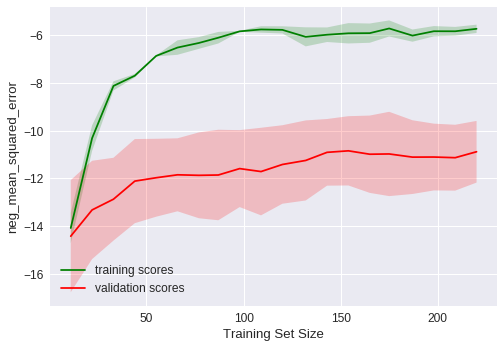

In [64]:
#Это график MSE со знаком минус, поэтому функции возрастают.
plot_learning_curve(grid_rfr.best_estimator_,
                   X_train_new_features, y_train_row, scoring='neg_mean_squared_error', cv=5)

### Результаты на тестовой выборке ###

In [71]:
#Впринципе результаты сравнимы с результатами на кроссвалидации.
#Хотя все же немного обидно, что различие существенно, ведь разбиение на трейн и тест было случайным.
#Исходное приближение средним улучшить удалось.
print(mean_squared_error(y_test_row,grid_rfr.best_estimator_.predict(X_test_new_features)),'vs baseline:',baseline_mean)

13.2907965027 vs baseline: 15.0645386839


## Выводы ##

### Нам удалось выделить наиболее значимые признаки влияющие на успеваемость школьников и это, наверное, самое главное, потому что на признаки можно повлиять. Также, зная успеваемость и признаки школьников из одного класса, можно спрогнозировать успеваемость в другом классе. Интересно было бы исследовать важность признаков для разных школ. Например, какие признаки наиболее влияют на успеваемость для сельской школы, а какие для городской. Для улучшения решения можно было бы дополнительно использовать градиентный бустинг, который себя неплохо показал, а потом его результаты объединить со случайным лесом. ###